# Marker selection for scRNA-seq Data

In [1]:
import scanpy as sc
sc.settings.verbosity = 3  

Data downloaded from https://gbiomed.kuleuven.be/english/research/50000622/laboratories/54213024/scRNAseq-NSCLC

In [2]:
adata = sc.read_loom("../../lung/Thienpont_Tumors_52k_v4_R_fixed.loom", validate=False)

In [3]:
adata

AnnData object with n_obs × n_vars = 52698 × 33694
    obs: 'CellFromTumor', 'ClusterID', 'ClusterName', 'Clusterings', 'Embedding', 'Embeddings_X', 'Embeddings_Y', 'PatientNumber', 'RegulonsAUC', 'Sample', 'nGene', 'nUMI'
    var: 'Regulons'

normalizing counts per cell
    finished (0:00:00)


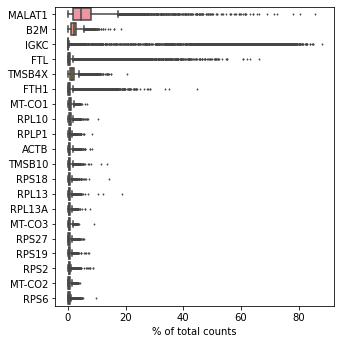

In [4]:
sc.pl.highest_expr_genes(adata, n_top=20)

C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\anndata\_core\anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'CellFromTumor' as categorical
... storing 'ClusterName' as categorical
... storing 'Clusterings' as categorical
... storing 'PatientNumber' as categorical
... storing 'Sample' as categorical
... storing 'Regulons' as categorical


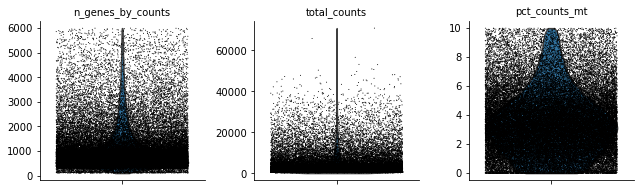

In [5]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\anndata\_core\anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


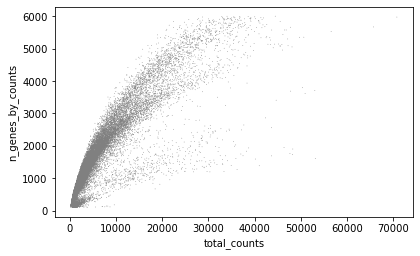

In [6]:
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

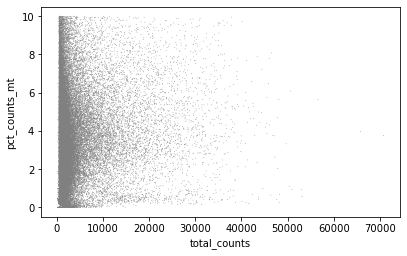

In [7]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')

In [8]:
sc.pp.filter_genes(adata, min_cells=3)

filtered out 9616 genes that are detected in less than 3 cells


C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\anndata\_core\anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [9]:
adata

AnnData object with n_obs × n_vars = 52698 × 24078
    obs: 'CellFromTumor', 'ClusterID', 'ClusterName', 'Clusterings', 'Embedding', 'Embeddings_X', 'Embeddings_Y', 'PatientNumber', 'RegulonsAUC', 'Sample', 'nGene', 'nUMI', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'Regulons', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


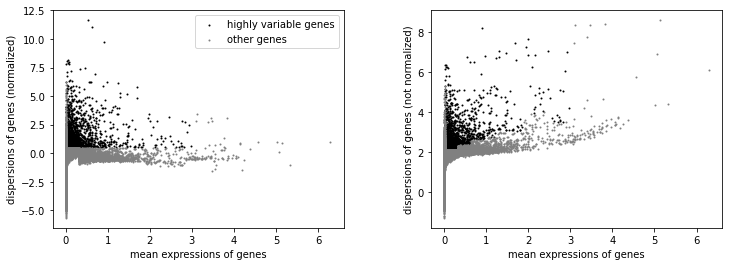

In [10]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

In [11]:
adata.var.highly_variable.sum()

2136

In [12]:
adata = adata[:, adata.var.highly_variable]

In [13]:
sc.pp.scale(adata, max_value=10)

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\scanpy\preprocessing\_simple.py:806: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [15]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50


C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\anndata\_core\anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


    finished (0:00:05)


In [18]:
import numpy
random5000 = numpy.random.choice(range(adata.shape[0]), 5000, False)

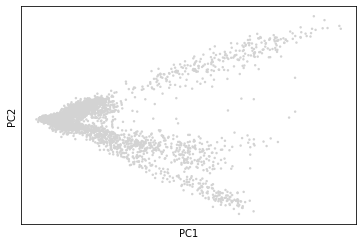

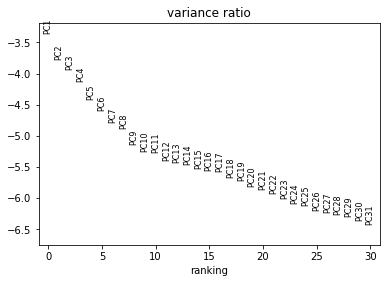

In [20]:
sc.pl.pca(adata[random5000, :])
sc.pl.pca_variance_ratio(adata, log=True)

In [21]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:16)


In [22]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:32)


In [23]:
sc.tl.leiden(adata)

running Leiden clustering
    finished: found 33 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:17)


C:\Users\SLiang3\Miniconda3\envs\scanpy37\lib\site-packages\anndata\_core\anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


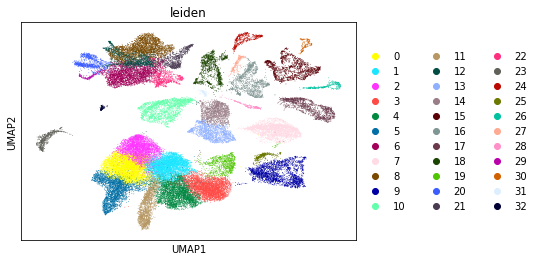

In [24]:
sc.pl.umap(adata, color=['leiden'])

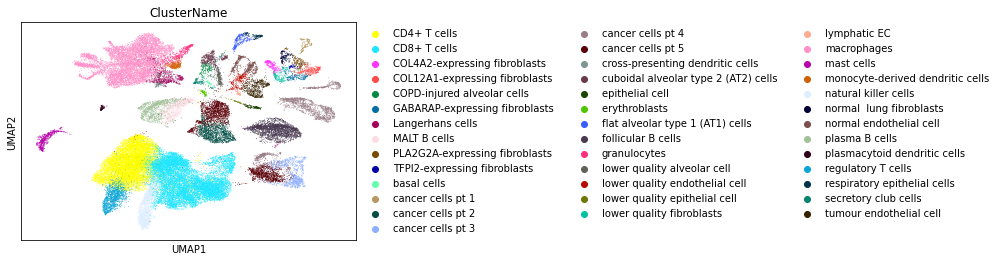

In [25]:
sc.pl.umap(adata, color=['ClusterName'])

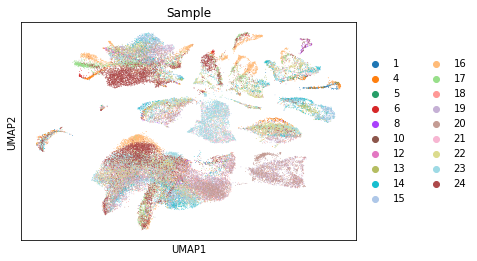

In [26]:
sc.pl.umap(adata, color=['Sample'])